# Лабораторная работа № 2 
## Логинов Сергей
### Вариант 21

1. Считаем заданный набор данных из репозитория UCI, используя Pandas

In [16]:
import pandas as pd
import numpy as np

In [17]:
url = \
"http://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data"

my_data = pd.read_csv( url, header=None)
my_data.columns = ['V' + str(i) for i in range(0, 280)] #prefix="V" old and will be removed in future
print( "\n*** Начало данных:\n", my_data.head() ) # начальные данные
print( "\n*** Конец данных:\n",  my_data.tail() ) # конечные данные

summary = my_data.describe()                      # сводка данных 
print( "\n*** Сводка данных:\n", summary)


*** Начало данных:
    V0  V1   V2  V3   V4   V5   V6   V7   V8  V9  ... V270  V271 V272 V273  \
0  75   0  190  80   91  193  371  174  121 -16  ...  0.0   9.0 -0.9  0.0   
1  56   1  165  64   81  174  401  149   39  25  ...  0.0   8.5  0.0  0.0   
2  54   0  172  95  138  163  386  185  102  96  ...  0.0   9.5 -2.4  0.0   
3  55   0  175  94  100  202  380  179  143  28  ...  0.0  12.2 -2.2  0.0   
4  75   0  190  80   88  181  360  177  103 -16  ...  0.0  13.1 -3.6  0.0   

  V274  V275  V276  V277  V278  V279  
0  0.0   0.9   2.9  23.3  49.4     8  
1  0.0   0.2   2.1  20.4  38.8     6  
2  0.0   0.3   3.4  12.3  49.0    10  
3  0.0   0.4   2.6  34.6  61.6     1  
4  0.0  -0.1   3.9  25.4  62.8     7  

[5 rows x 280 columns]

*** Конец данных:
      V0  V1   V2  V3   V4   V5   V6   V7   V8  V9  ... V270  V271  V272 V273  \
447  53   1  160  70   80  199  382  154  117 -37  ...  0.0   4.3  -5.0  0.0   
448  37   0  190  85  100  137  361  201   73  86  ...  0.0  15.6  -1.6  0.0  

2. Проведем исследование числовых признаков. Заменим пропущенные значения. Приведем к числовым типам.

In [18]:
my_data = my_data.replace('?', np.NaN)
my_data = my_data.fillna(my_data.median())
for i in my_data:
    if my_data[i].dtype == "object":
        my_data[i] = pd.to_numeric(my_data[i])

In [19]:
my_data.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


3. В данной выборке имееется несколько категориальных признаков: V1, V2, V20-V26. Определим числовой признак, имеющий максимальную дисперсию.

In [20]:
def max_std(data):
    max_std_key = 0
    max_std_value = 0
    for i in data:
        tmp_std = data[i].std()
        if max_std_value < tmp_std:
            max_std_value = tmp_std
            max_std_key = i
    return {max_std_key : max_std_value}
numeric_attr_with_max_std = max_std(my_data)
print(numeric_attr_with_max_std)

{'V10': 57.34637571704272}


4. При помощи класса SelectKBest библиотеки scikit-learn найдем два признака, имеющих наиболее выраженную взаимосвязь с признаком, имеющим максимальную дисперсию (в данном случае это V10). В данном случае я удаляю признаки с низкой дисперсией, нормализую данные и вычисляю 2 признака. Так как V10 является непрерывным признаком, то мы используем статистический критерий f_regression.

In [21]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = my_data.drop(['V10'], axis=1).values
X = sel.fit_transform(X)
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)
Y = my_data["V10"].values
test = SelectKBest(score_func=f_regression, k=2)
fit = test.fit(X, Y)

In [22]:
cols = test.get_support(indices=True)
df_new = my_data.iloc[:,cols]
print("\nОтобранные признаки:\n",df_new)


Отобранные признаки:
      V102  V127
0       0     0
1       0     0
2      60     0
3       0     0
4       0     0
..    ...   ...
447     0     0
448     0     0
449     0     0
450     0     0
451     0     0

[452 rows x 2 columns]


5. Визуализируем набор данных в виде точек плоскости с координатами, соответствующими найденным признакам.

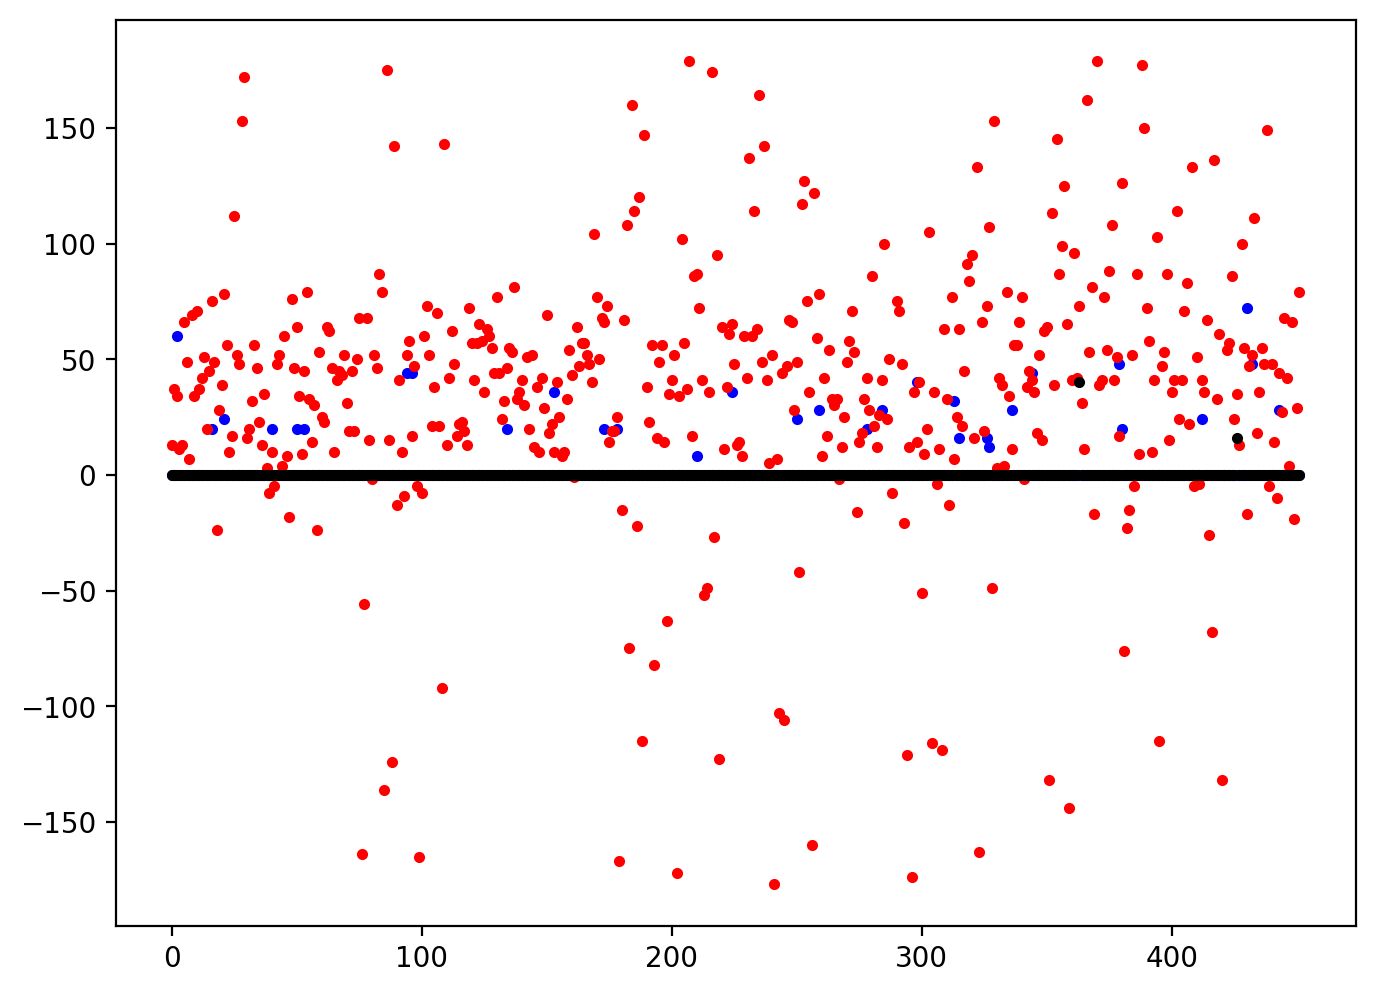

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt 

plt.figure( figsize=(8, 6), dpi=200 )
plt.plot(my_data["V102"].values, 'b.');
plt.plot(my_data["V10"].values, 'r.');
plt.plot(my_data["V127"].values, 'k.');

6. Найдем и выведем на экран размерность метода главных компонент, для которой доля объясняемой дисперсии будет не менее 99%

In [24]:
from sklearn.decomposition import PCA

enough_r = 1
flag = False
for r in range(1,281):
  pca = PCA( n_components = r )
  pca.fit( my_data.values )
  tmp = sum(pca.explained_variance_ratio_)
  print( "r =",r,"\tДисперсия =", tmp * 100, "%")
  if (tmp > .99) and (not flag):
    enough_r = r
    flag = True
print("Для значения r = {} дисперсия будет не менее 99%".format(enough_r))
        
        
        

r = 1 	Дисперсия = 15.661270826761758 %
r = 2 	Дисперсия = 25.621834571661832 %
r = 3 	Дисперсия = 34.82012218984459 %
r = 4 	Дисперсия = 43.3100505312845 %
r = 5 	Дисперсия = 48.68922027144323 %
r = 6 	Дисперсия = 53.89765807249073 %
r = 7 	Дисперсия = 58.43587886941775 %
r = 8 	Дисперсия = 62.55942676916963 %
r = 9 	Дисперсия = 65.88593234550922 %
r = 10 	Дисперсия = 68.8291648445902 %
r = 11 	Дисперсия = 71.65692750160963 %
r = 12 	Дисперсия = 73.89987418544015 %
r = 13 	Дисперсия = 75.99648819871088 %
r = 14 	Дисперсия = 77.93009301927574 %
r = 15 	Дисперсия = 79.65151827592841 %
r = 16 	Дисперсия = 81.19509111067471 %
r = 17 	Дисперсия = 82.53503464322446 %
r = 18 	Дисперсия = 83.76036131123608 %
r = 19 	Дисперсия = 84.9464448608823 %
r = 20 	Дисперсия = 85.85996271381056 %
r = 21 	Дисперсия = 86.7268275700529 %
r = 22 	Дисперсия = 87.48950495659449 %
r = 23 	Дисперсия = 88.20655780492697 %
r = 24 	Дисперсия = 88.88054110387925 %
r = 25 	Дисперсия = 89.51266709923107 %
r = 26 	Дис

r = 209 	Дисперсия = 99.99989488098886 %
r = 210 	Дисперсия = 99.99990068223555 %
r = 211 	Дисперсия = 99.99990626677379 %
r = 212 	Дисперсия = 99.99991159171725 %
r = 213 	Дисперсия = 99.99991656939889 %
r = 214 	Дисперсия = 99.99992149910743 %
r = 215 	Дисперсия = 99.99992637102841 %
r = 216 	Дисперсия = 99.99993097214168 %
r = 217 	Дисперсия = 99.99993533199384 %
r = 218 	Дисперсия = 99.99993956496036 %
r = 219 	Дисперсия = 99.99994365824345 %
r = 220 	Дисперсия = 99.99994757230229 %
r = 221 	Дисперсия = 99.99995123620413 %
r = 222 	Дисперсия = 99.99995472924776 %
r = 223 	Дисперсия = 99.99995803405868 %
r = 224 	Дисперсия = 99.99996132478094 %
r = 225 	Дисперсия = 99.99996430246213 %
r = 226 	Дисперсия = 99.99996713144694 %
r = 227 	Дисперсия = 99.99996978298273 %
r = 228 	Дисперсия = 99.99997240609402 %
r = 229 	Дисперсия = 99.99997485402177 %
r = 230 	Дисперсия = 99.99997713158493 %
r = 231 	Дисперсия = 99.99997935500731 %
r = 232 	Дисперсия = 99.99998140360093 %
r = 233 	Дисперс

7. Пользуясь методом главных компонент, снизим размерность набора данных до двух признаков и изобразим полученный набор данных в виде точек на плоскости, отображая точки различных классов разными цветами.

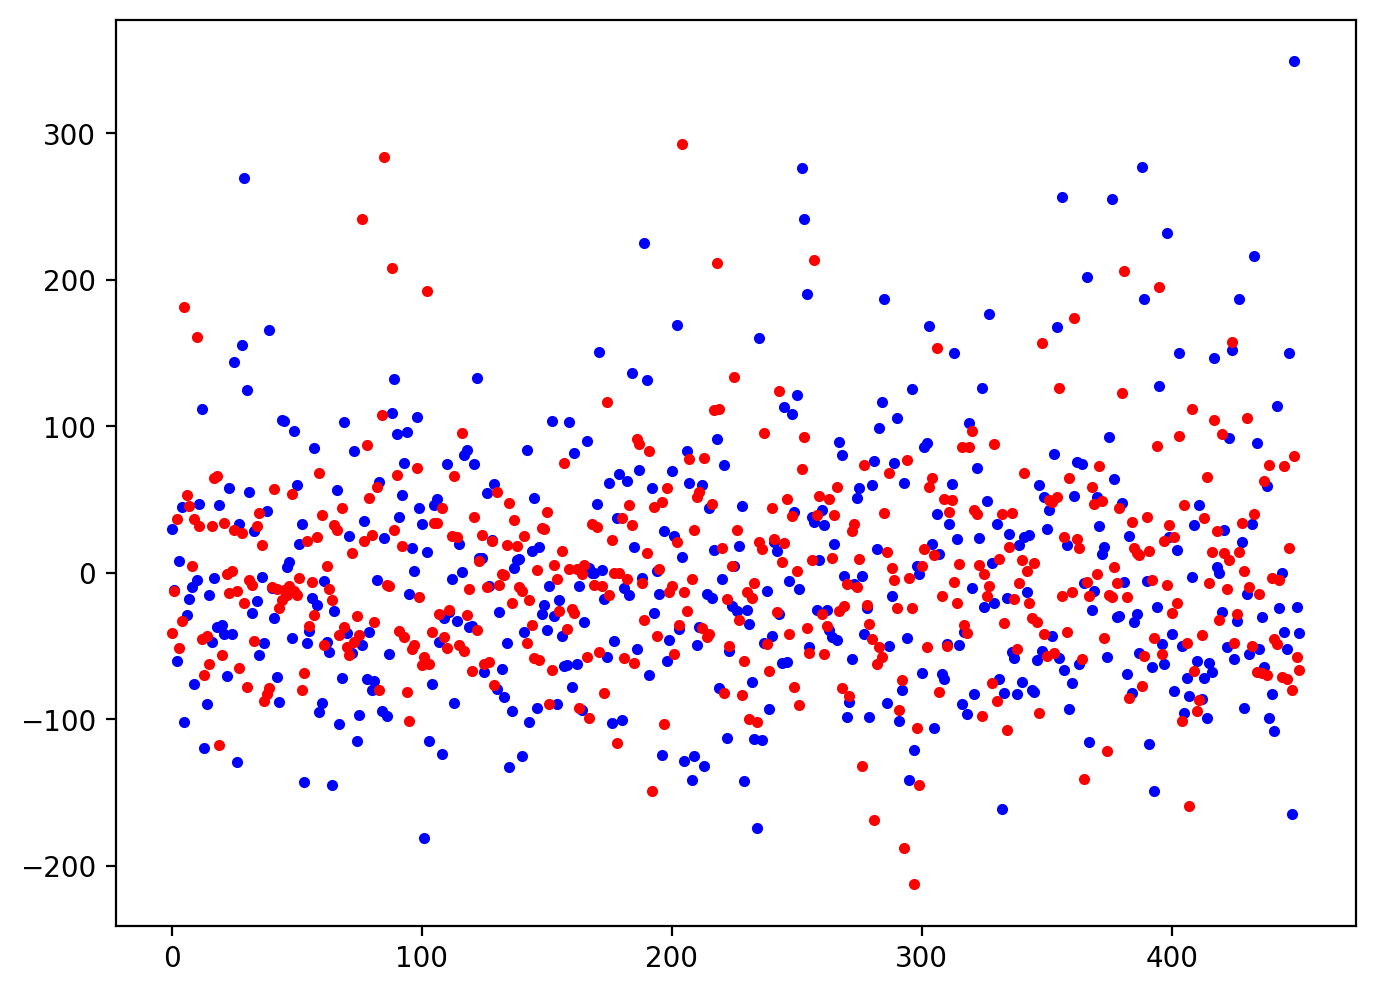

In [26]:
X = my_data.values
pca = PCA(n_components=2)
pcad = pca.fit_transform( X )
fit = pca.fit(X)
features = fit.transform(X)
X1 = []
X2 = []
for i in features:
    X1.append(i[0])
    X2.append(i[1])
plt.figure( figsize=(8, 6), dpi=200 )
plt.plot(X1, 'b.');
plt.plot(X2, 'r.');